### Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

* Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:


    данные приложений из Google Play;
    данные о видео из трендов YouTube;
    данные об уровне счастья в разных странах.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,5

In [6]:
df = pd.read_csv('googleplaystore.csv')

In [7]:
print(df.shape)

(10841, 13)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [58]:
dynamics = df[['Installs', 'Rating']] \
    .groupby('Rating').count()
dynamics

,Installs
Rating,
1.0,16
1.2,1
1.4,3
1.5,3
1.6,4
1.7,8
1.8,8
1.9,13
2.0,12


Text(0, 0.5, 'Установок, шт.')

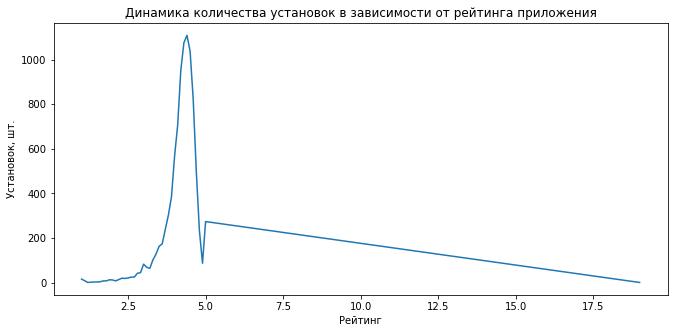

In [60]:
# применяем функцию plot из matplotlib
# для каждой дополнительной настройки есть своя функция
plt.plot(dynamics.index, dynamics['Installs'])
plt.title('Динамика количества установок в зависимости от рейтинга приложения')
plt.xlabel('Рейтинг')
plt.ylabel('Установок, шт.')

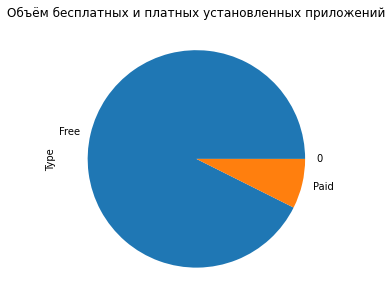

In [52]:
# количество игр по платформам
pie_data = df['Type'].value_counts()
pie_data.plot(kind='pie', title='Объём бесплатных и платных установленных приложений')

In [61]:
import seaborn as sns

Text(0.5, 1.0, 'Распределение оценок критиков')

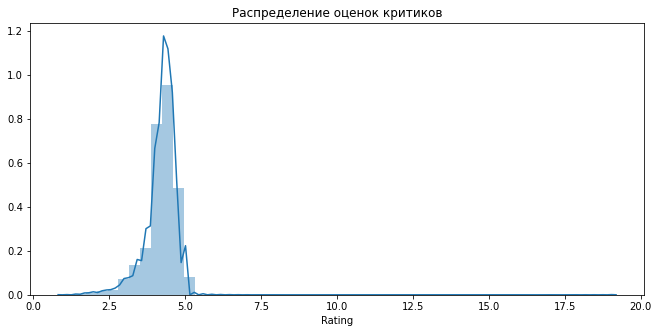

In [74]:
sns.distplot(df['Rating'])
plt.title('Распределение рейтингов')

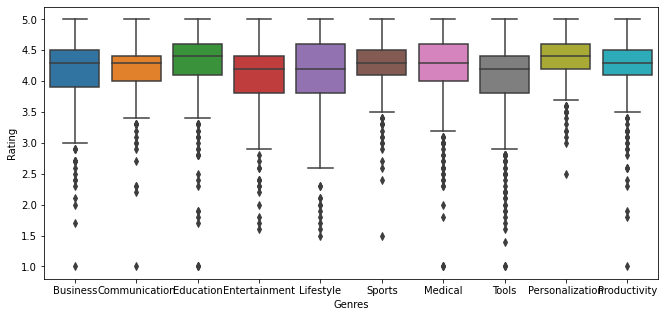

In [76]:
top_platforms = df['Genres'].value_counts().sort_values(ascending=False).head(10).index.values
# top_platforms
sns.boxplot(x="Genres", y="Rating", 
            data=df[df['Genres'].isin(top_platforms)])

### Дополнительная часть (необязательная)

построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;